# 목차
  1. 모듈 및 함수
  2. 데이터 핸들링
  3. Scatter, 상관계수

# 1. 모듈 및 함수

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import math
import re

In [ ]:
def isNan(t):
  temp = make_array()

  for i in range(len(t)):
    j = 0

    for j in range(len(t.rows)):
      if (math.isnan(t.column(i)[j]) == True):
        temp = np.append(temp, j)

      j += 1

  return list((set(temp)))

In [ ]:
def prtInfo(t):
  print('\n행의 수 : {x}\n열의 수 : {y}\nnan이 포함된 행의 수 : {z}'.format(x=t.num_columns, y=t.num_rows, z=len(isNan(t))))

In [ ]:
def delDate(t, date):
  temp = make_array()

  for i in range (t.num_rows):
    count = 0

    for j in range (len(date)):
      if t.column(0)[i] == date[j]:
        count = count + 1

    if count == 0:
      temp = np.append(temp, i)

  temp = temp.astype(np.int64)  
  return list(temp)

In [ ]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [ ]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [ ]:
def draw_scatter(t, x, y):
  Table().with_columns(
    'x (standard units)',  standard_units(t.column(x)), 
    'y (standard units)', standard_units(t.column(y))
  ).scatter(0, 1);

# 2. 데이터 핸들링

In [ ]:
pollution = Table.read_table('서울시 일별 평균 대기오염도 정보.csv', encoding='CP949')
pollution.show(5)
print('\n{x}\n'.format(x=pollution.dtype))

측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
20201208,강남구,0.021,0.021,0.4,0.003,20,12
20201208,강남대로,0.03,0.015,0.6,0.004,24,11
20201208,강동구,0.025,0.02,0.4,0.003,26,17
20201208,강변북로,0.027,0.018,0.5,0.003,22,14
20201208,강북구,0.016,0.021,0.4,0.003,25,13



측정일시  | 측정소명 | 이산화질소농도(ppm) | 오존농도(ppm) | 일산화탄소농도(ppm) | 아황산가스(ppm) | 미세먼지(㎍/㎥) | 초미세먼지(㎍/㎥)
int64 | <U6  | float64      | float64   | float64      | float64    | float64   | float64



/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [ ]:
pollution = pollution.select(make_array(0, 6, 7))
pollution.show(5)
prtInfo(pollution)

측정일시,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
20201208,20,12
20201208,24,11
20201208,26,17
20201208,22,14
20201208,25,13



행의 수 : 3
열의 수 : 18183
nan이 포함된 행의 수 : 696


In [ ]:
hand_poll = pollution.remove(isNan(pollution)).group('측정일시', np.mean)
hand_poll.show(5)
prtInfo(hand_poll)

측정일시,미세먼지(㎍/㎥) mean,초미세먼지(㎍/㎥) mean
20191208,54.7174,39.913
20191209,62.8936,44.7021
20191210,96.7234,69.4255
20191211,80.0638,53.6596
20191212,21.1778,13.9778



행의 수 : 3
열의 수 : 365
nan이 포함된 행의 수 : 0


In [ ]:
weather = Table.read_table('서울시 일별 날씨 정보.csv', encoding='CP949')
weather.show(5)
print('\n{x}\n'.format(x=weather.dtype))

지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 상대습도(%)
108,서울,2019-12-08,-0.9,nan,1.4,70,65.1
108,서울,2019-12-09,3.2,0,2.5,70,56.8
108,서울,2019-12-10,8.1,1.7,1.2,50,82.3
108,서울,2019-12-11,6.3,0.2,3.4,270,62
108,서울,2019-12-12,-0.7,nan,1.8,290,45.4



지점    | 지점명  | 일시   | 평균기온(°C) | 일강수량(mm) | 평균 풍속(m/s) | 최다풍향(16방위) | 평균 상대습도(%)
int64 | <U2  | <U10 | float64  | float64  | float64    | int64      | float64



/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [ ]:
for i in range(len(weather.rows)):
  weather.column(2)[i] = re.sub('-', '', weather.column(2)[i])

weather = weather.with_column('측정일시', weather.column(2).astype(np.int64)).drop('지점', '지점명', '일시', '최다풍향(16방위)')
weather.show(5)
prtInfo(weather)

평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),측정일시
-0.9,nan,1.4,65.1,20191208
3.2,0,2.5,56.8,20191209
8.1,1.7,1.2,82.3,20191210
6.3,0.2,3.4,62,20191211
-0.7,nan,1.8,45.4,20191212



행의 수 : 5
열의 수 : 366
nan이 포함된 행의 수 : 209


In [ ]:
hand_wth = weather.remove(isNan(weather)).group('측정일시', np.mean)
hand_wth.show(5)
prtInfo(hand_wth)

측정일시,평균기온(°C) mean,일강수량(mm) mean,평균 풍속(m/s) mean,평균 상대습도(%) mean
20191209,3.2,0,2.5,56.8
20191210,8.1,1.7,1.2,82.3
20191211,6.3,0.2,3.4,62
20191213,2.1,1,2,53.6
20191214,2.7,0,2.3,58.3



행의 수 : 5
열의 수 : 157
nan이 포함된 행의 수 : 0


In [ ]:
date = make_array()

for i in (hand_poll.column(0)):
  for j in (hand_wth.column(0)):
    if i == j:
      date = np.append(date, i)

date = date.astype(np.int64)

In [ ]:
hand_poll.remove(delDate(hand_poll, date)).group('측정일시', np.mean)
hand_wth.remove(delDate(hand_wth, date)).group('측정일시', np.mean)

finish = hand_wth.with_columns(
    'Dust(mg/m^3)', hand_poll.column(1),
    'Ultra Dust(mg/m^3)', hand_poll.column(2)
)

finish.relabel(
    '평균기온(°C) mean', 'Temperature(°C)').relabel(
        '일강수량(mm) mean', 'Precipitation(mm)'
    ).relabel(
        '평균 풍속(m/s) mean', 'Wind speed(m/s)'
    ).relabel(
        '평균 상대습도(%) mean', 'Humidity(%)'
    )

finish.show(5)
prtInfo(finish)

측정일시,Temperature(°C),Precipitation(mm),Wind speed(m/s),Humidity(%),Dust(mg/m^3),Ultra Dust(mg/m^3)
20191209,3.2,0,2.5,56.8,62.8936,44.7021
20191210,8.1,1.7,1.2,82.3,96.7234,69.4255
20191211,6.3,0.2,3.4,62,80.0638,53.6596
20191213,2.1,1,2,53.6,29.3778,16.7333
20191214,2.7,0,2.3,58.3,39.5556,25.7333



행의 수 : 7
열의 수 : 156
nan이 포함된 행의 수 : 0


# 3. Scatter, 상관계수

상관계수 : -0.3152257799410169


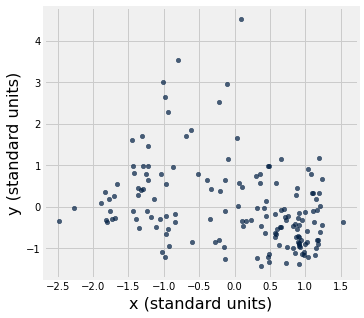

In [ ]:
draw_scatter(finish, 1, 5)
print("상관계수 : {x}".format(x=correlation(finish, 1, 5)))

상관계수 : -0.33943273042912714


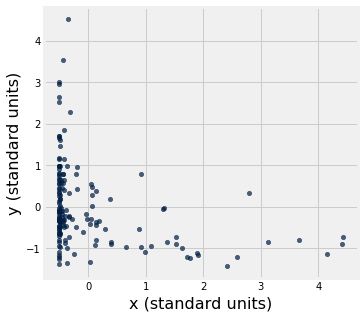

In [ ]:
draw_scatter(finish, 2, 5)
print("상관계수 : {x}".format(x=correlation(finish, 2, 5)))

상관계수 : -0.11073286180687598


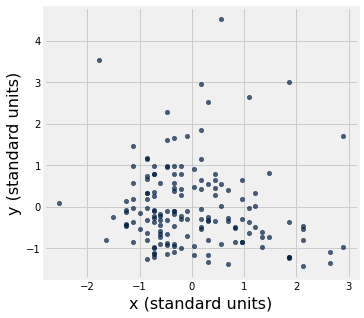

In [ ]:
draw_scatter(finish, 3, 5)
print("상관계수 : {x}".format(x=correlation(finish, 3, 5)))

상관계수 : -0.38222282214448255


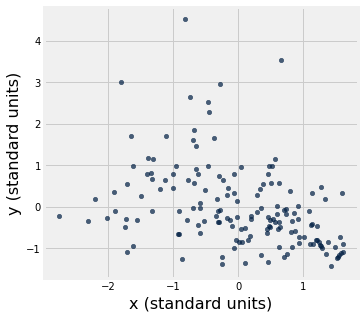

In [ ]:
draw_scatter(finish, 4, 5)
print("상관계수 : {x}".format(x=correlation(finish, 4, 5)))

상관계수 : -0.3649449200339349


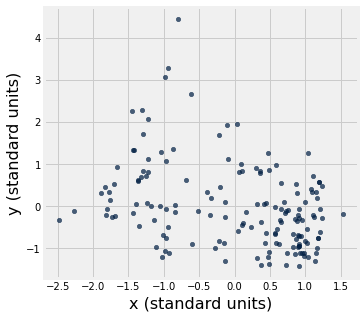

In [ ]:
draw_scatter(finish, 1, 6)
print("상관계수 : {x}".format(x=correlation(finish, 1, 6)))

상관계수 : -0.31858775736592776


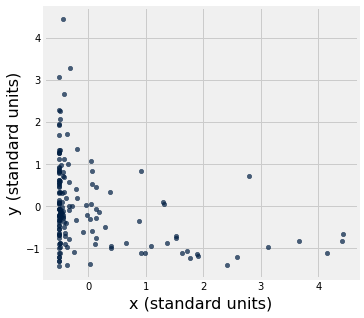

In [ ]:
draw_scatter(finish, 2, 6)
print("상관계수 : {x}".format(x=correlation(finish, 2, 6)))

상관계수 : -0.2393118701428856


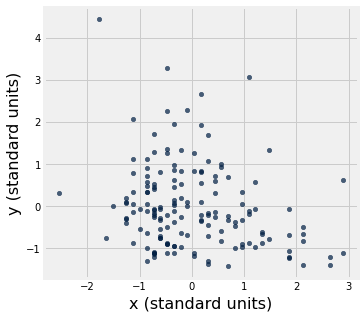

In [ ]:
draw_scatter(finish, 3, 6)
print("상관계수 : {x}".format(x=correlation(finish, 3, 6)))

상관계수 : -0.281811634869631


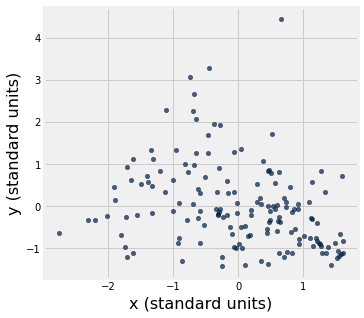

In [ ]:
draw_scatter(finish, 4, 6)
print("상관계수 : {x}".format(x=correlation(finish, 4, 6)))